<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Use-a-small-dataset-with-5-categories" data-toc-modified-id="Use-a-small-dataset-with-5-categories-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Use a small dataset with 5 categories</a></span><ul class="toc-item"><li><span><a href="#Create-a-dataloader" data-toc-modified-id="Create-a-dataloader-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Create a dataloader</a></span></li><li><span><a href="#Train-with-resnet50" data-toc-modified-id="Train-with-resnet50-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Train with resnet50</a></span></li></ul></li><li><span><a href="#Train-with-a-smaller-dataset-for-faster-training-iteration" data-toc-modified-id="Train-with-a-smaller-dataset-for-faster-training-iteration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Train with a smaller dataset for faster training iteration</a></span><ul class="toc-item"><li><span><a href="#Create-a-dataloader" data-toc-modified-id="Create-a-dataloader-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Create a dataloader</a></span></li><li><span><a href="#Train-with-resnet50" data-toc-modified-id="Train-with-resnet50-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Train with resnet50</a></span></li></ul></li></ul></div>

In [2]:
!pip install fastai2

     |████████████████████████████████| 194kB 5.4MB/s 


In [3]:
from fastai2.vision.all import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Use a small dataset with 5 categories, 750 images each for training set

In [ ]:
path = Path('data/tinyset')

In [ ]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#3) [Path('.DS_Store'),Path('train'),Path('val')]

In [ ]:
files = get_image_files(path)

In [ ]:
len(files)

5000

## Create a dataloader

In [ ]:
dblock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   splitter=GrandparentSplitter(train_name="train", valid_name="val"),
                   item_tfms=Resize(224)
                   )

In [ ]:
dblock.summary(path)

Setting-up type transforms pipelines
Found 5000 items
2 datasets of sizes 3750,1250
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      data/tinyset/train/steak/239025.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=384x512
  Pipeline: parent_label -> Categorize
    starting from
      data/tinyset/train/steak/239025.jpg
    applying parent_label gives
      steak
    applying Categorize gives
      TensorCategory(3)

Final sample: (PILImage mode=RGB size=384x512, TensorCategory(3))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starting from
      (PILImage mode=RGB size=384x512, TensorCategory(3))
    applying Resize gives
      (PILImage mode=RGB size=224x224, TensorCategory(3

In [ ]:
dls = dblock.dataloaders(path, num_workers=0)

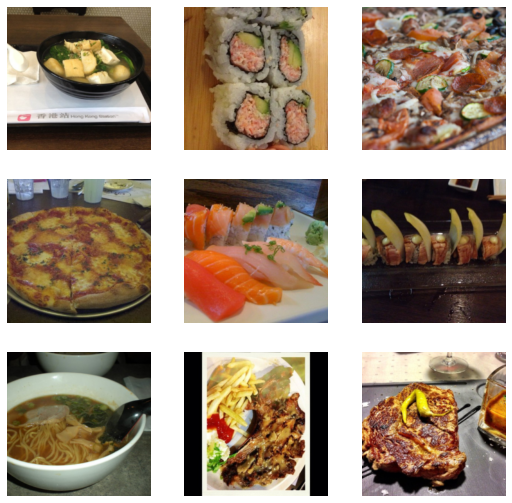

In [ ]:
dls.show_batch()

In [ ]:
dsets.vocab

(#5) ['bibimbap','pizza','ramen','steak','sushi']

## Train with resnet50

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.724533,0.255494,0.920800,30:20


epoch,train_loss,valid_loss,accuracy,time
0,0.327530,0.164982,0.955200,37:13
1,0.147133,0.132116,0.968800,38:00


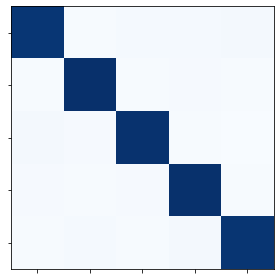

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.most_confused()

[('sushi', 'steak', 5),
 ('bibimbap', 'sushi', 4),
 ('ramen', 'bibimbap', 4),
 ('bibimbap', 'ramen', 3),
 ('bibimbap', 'steak', 3),
 ('sushi', 'pizza', 3),
 ('pizza', 'steak', 2),
 ('ramen', 'pizza', 2),
 ('steak', 'bibimbap', 2),
 ('steak', 'ramen', 2),
 ('bibimbap', 'pizza', 1),
 ('pizza', 'bibimbap', 1),
 ('pizza', 'ramen', 1),
 ('pizza', 'sushi', 1),
 ('ramen', 'steak', 1),
 ('steak', 'pizza', 1),
 ('steak', 'sushi', 1),
 ('sushi', 'bibimbap', 1),
 ('sushi', 'ramen', 1)]

# Use a smaller dataset with 5 categories, 100 images for training set

In [ ]:
path = Path('/content/drive/My Drive/Food-101/food-101-tinyset-100')
Path.BASE_PATH = path
path.ls()

(#3) [Path('.DS_Store'),Path('train'),Path('valid')]

In [ ]:
files = get_image_files(path)

In [ ]:
len(files)

1750

## Create a dataloader

In [ ]:
dblock = DataBlock(blocks     = (ImageBlock, CategoryBlock),
                   get_items  = get_image_files,
                   get_y      = parent_label,
                   splitter   = GrandparentSplitter(),
                   item_tfms  = Resize(384),
                   batch_tfms = aug_transforms(size=224, min_scale=0.75))
dls = dblock.dataloaders(path, num_workers=0, bs=50)

In [ ]:
dblock.summary(path)

Setting-up type transforms pipelines
Found 1750 items
2 datasets of sizes 500,1250
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      /content/drive/My Drive/Food-101/food-101-tinyset-100/train/sushi/2030393.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=512x512
  Pipeline: parent_label -> Categorize
    starting from
      /content/drive/My Drive/Food-101/food-101-tinyset-100/train/sushi/2030393.jpg
    applying parent_label gives
      sushi
    applying Categorize gives
      TensorCategory(4)

Final sample: (PILImage mode=RGB size=512x512, TensorCategory(4))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -> AffineCoordTfm -> RandomResizedCropGPU -> LightingTfm

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starting from

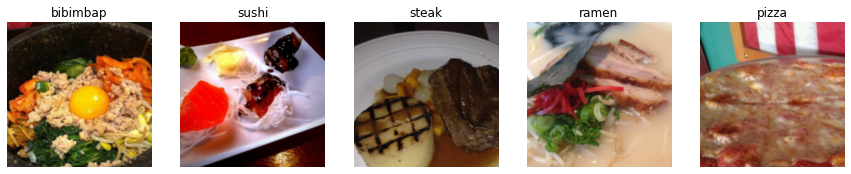

In [ ]:
dls.show_batch(nrows=1, ncols=5)

## Train with resnet50

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.538813,0.499024,0.838400,09:34


epoch,train_loss,valid_loss,accuracy,time
0,0.465704,0.348655,0.885600,00:26
1,0.335868,0.342877,0.910400,00:25
2,0.268882,0.319107,0.910400,00:25


# Baseline model

## Use a dataset with 10 categories, 100 images each for training set

In [5]:
path = Path('/content/drive/My Drive/Food-101/food-101-tinyset-100')
Path.BASE_PATH = path
path.ls()

(#2) [Path('train'),Path('valid')]

In [6]:
files = get_image_files(path)
len(files)

3500

In [7]:
def get_dls(batch_size, img_size):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                       get_items=get_image_files,
                       get_y=parent_label,
                       splitter=GrandparentSplitter(),
                       item_tfms=Resize(460),
                       batch_tfms=aug_transforms(size=img_size, min_scale=0.75))
    return dblock.dataloaders(path, bs=batch_size)

In [ ]:
dls = get_dls(128, 224)

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.715778,1.089172,0.656000,00:23


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


epoch,train_loss,valid_loss,accuracy,time
0,1.046330,0.706843,0.769200,00:23
1,0.816567,0.644759,0.797600,00:22
2,0.648835,0.607758,0.826400,00:22
3,0.519941,0.574507,0.835200,00:22
4,0.435676,0.565177,0.836400,00:22


# Progressive Resizing

Progressive Resizing is to start training from small images and gradually using larger images over time.

This helps 

In [10]:
dls = get_dls(128, 128)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [16]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


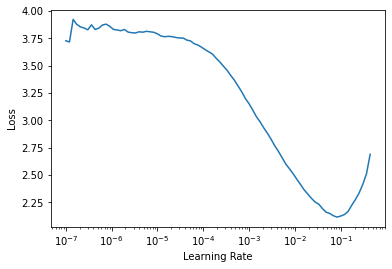

In [ ]:
lr_min, lr_steep = learn.lr_find()

In [17]:
learn.fit_one_cycle(n_epoch=3, lr_max=1e-3 )

epoch,train_loss,valid_loss,accuracy,time
0,3.080187,1.552444,0.516000,00:23
1,2.209398,1.134174,0.676800,00:23
2,1.774893,1.098683,0.684400,00:23


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [18]:
learn.dls = get_dls(64, 256)
learn.fine_tune(epochs=5, base_lr=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.091424,1.341987,0.637600,00:25


epoch,train_loss,valid_loss,accuracy,time
0,0.582805,0.798702,0.782800,00:26
1,0.482059,0.809196,0.799200,00:25
2,0.369935,0.621558,0.837600,00:25
3,0.290372,0.545756,0.854000,00:25
4,0.220459,0.512104,0.858000,00:25


In [19]:
learn.dls = get_dls(32, 512)
learn.fine_tune(epochs=5, base_lr=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.480798,0.598602,0.838400,00:44


epoch,train_loss,valid_loss,accuracy,time
0,0.342324,0.623538,0.836800,00:48
1,0.425557,0.758767,0.818000,00:47
2,0.430057,0.603737,0.851200,00:47
3,0.335620,0.455539,0.870800,00:47
4,0.221802,0.425487,0.880400,00:47


### Start from image size 64 -> 128 -> 224

In [ ]:
dls = get_dls(256, 64)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.663592,2.776058,0.173200,00:23
1,3.362397,2.175867,0.371600,00:20
2,3.009087,1.951653,0.460000,00:20
3,2.765268,1.896386,0.488800,00:20
4,2.596931,1.833575,0.494800,00:20


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [ ]:
learn.dls = get_dls(128, 128)
learn.fine_tune(5, 3e-3)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


epoch,train_loss,valid_loss,accuracy,time
0,1.806704,2.460967,0.348000,00:20


epoch,train_loss,valid_loss,accuracy,time
0,1.158489,1.686823,0.516800,00:20
1,0.961582,1.439140,0.603600,00:20
2,0.795000,1.253307,0.678400,00:20
3,0.667621,1.080443,0.722800,00:20
4,0.589757,0.993866,0.738400,00:20


In [ ]:
learn.dls = get_dls(64, 256)
learn.fine_tune(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.557166,0.669555,0.813200,00:22


epoch,train_loss,valid_loss,accuracy,time
0,0.360606,0.671582,0.834000,00:23
1,0.336020,0.783929,0.809200,00:22
2,0.301259,0.697625,0.830800,00:23
3,0.241360,0.587747,0.852800,00:22
4,0.186364,0.549362,0.860000,00:22


In [ ]:
learn.dls = get_dls(32, 512)
learn.fine_tune(5, 3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.449866,0.646708,0.825200,00:42


epoch,train_loss,valid_loss,accuracy,time
0,0.354290,0.614934,0.832800,00:47
1,0.310154,0.540830,0.854000,00:46
2,0.240310,0.519639,0.856800,00:46
3,0.185431,0.500600,0.862800,00:46
4,0.162943,0.504764,0.858800,00:46


In [ ]:
learn.dls = get_dls(64, 224)
learn.fine_tune(5, 3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.032475,0.523290,0.861200,00:21


epoch,train_loss,valid_loss,accuracy,time
0,0.027709,0.522325,0.864000,00:22
1,0.021935,0.511130,0.865200,00:22
2,0.020776,0.515268,0.865200,00:22
3,0.023609,0.525598,0.864000,00:22
4,0.022429,0.524281,0.865200,00:22


# Test Time Augmentation

Test Time Augmentation is generating various versions of augmentated images during inference or validation and then taking the average or maximum of the predictions for the augmentated versions of each image.

TTA can help increase the accuracy by increasing the chance that each part of image is featured. (???)

In [21]:
preds, targets = learn.tta()
accuracy(preds, targets).item()

0.8888000249862671

# Mixup

In [33]:
dls = get_dls(128, 224)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [34]:
learn = cnn_learner(dls, resnet50, metrics=accuracy, cbs=MixUp)

In [35]:
learn.fit_one_cycle(50, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.469340,2.176691,0.291600,00:25
1,2.940089,1.222296,0.590000,00:25
2,2.573244,0.848735,0.725600,00:25
3,2.363140,0.707555,0.779600,00:25
4,2.197926,0.687860,0.794400,00:25
5,2.029866,0.676326,0.798400,00:25
6,1.909922,0.672667,0.800800,00:25
7,1.796196,0.671901,0.785200,00:25
8,1.682706,0.634375,0.809200,00:25
9,1.600546,0.608318,0.819600,00:25


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


# Progressive Resizing + MixUp

# Label Smoothing